## Analysis II: a possible machine learning approach

# 1- Setup

Import some python modules and set the working directory to where the .py are located

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

# Set the working directory where the py modules are placed
# os.chdir('projects/Cavitazione.pompa.exp/py/')

# Path to datasets
# path_to_DS = '..\\data-raw\\Daset10_01_2013_PompeCCM'
path_to_DS = '/Users/csartori/dati/pump_cavitation/data-raw/DS1'
# path_to_DS = 'figure out the pathname of the data folder in your computer'

Import the remaining modules

Create a list with the path to each file of the first dataset (DS1)

In [2]:
DS = [os.path.join(path_to_DS, f) for f in os.listdir(path_to_DS)]
# output from listdir is in arbitrary order, file names include time, therefore
# we need to sort names to preserve the time sequence of the observations
DS.sort()

# 2- Read the DS1 file corresponding to "AIR IN" 

Hint: load the python module read_bin and store each record as a list element

In [3]:
import read_bin as rb

file_struct = rb.ptr_record(DS[4])

# Init data list
data = []

for record in file_struct[:, 0]:
    data.append(rb.read_record(DS[4], record))


Describe the structure of data

In [4]:
print(len(data))

print(len(data[0]))

# Timestamp
print(data[0][0])

# Raw signals: P1_x, P1_y, P1_z, P2_x, P2_y, P2_z.
print(data[0][1])

71
2
2013-01-10 08:47:53.343000
[[ 1.80972     6.7978945   0.46692607  0.86366063  1.1108568   0.8972305 ]
 [ 2.5238423   3.1586175  -0.20447089  0.35706112 -0.58899826 -2.1011672 ]
 [ 1.9577326   0.5004959  -1.107805    0.2746624  -2.1881437  -1.9851987 ]
 ...
 [-0.84992754  2.3544672   0.18921188 -0.21972992  2.7344167   0.4303044 ]
 [-1.4587625   2.5223162   0.64698255 -0.11749447 -2.543679   -1.0879682 ]
 [-1.1490043   1.1825742   0.30212864  2.1866179  -2.2674906  -3.387503  ]]


# 3- Plot the data 
See the "engineering_analysis"

# 4- Compute some basic stats for one record

Hint: experiment with the var, min, max functions in numpy

In [5]:
signals = data[0][1]

np.max(signals, axis=0)

array([4.1687646, 8.804456 , 2.902266 , 5.11635  , 8.278019 , 5.725185 ],
      dtype=float32)

Hint: use the describe function contained in the scipy module to get them all
plus the skewness and kurtosis

In [6]:
from scipy import stats

signals = data[0][1]

stats.describe(signals)

DescribeResult(nobs=75000, minmax=(array([-3.9719234, -5.932708 , -3.7827115, -4.5532923, -7.598993 ,
       -4.5166707], dtype=float32), array([4.1687646, 8.804456 , 2.902266 , 5.11635  , 8.278019 , 5.725185 ],
      dtype=float32)), mean=array([-0.03239394, -0.0270317 , -0.01420434,  0.02608252,  0.01184717,
        0.00649881], dtype=float32), variance=array([2.584697 , 4.09922  , 1.289377 , 1.5287522, 4.947999 , 1.7797433],
      dtype=float32), skewness=array([ 0.07405682,  0.8313229 , -0.23303755,  0.04843421,  0.17908572,
        0.4395835 ], dtype=float32), kurtosis=array([-0.7283037 ,  1.6642523 , -0.5742035 ,  0.09355831, -0.26575828,
        1.1809945 ], dtype=float32))

where the DescribeResult has the following structure:
<pre><code>
00. NOBS     : INT
01. MINMAX   : TUPLE(ARRAY(MIN), ARRAY(MAX))
02. MEAN     : ARRAY
03. VARIANCE : ARRAY
04. SKEWNESS : ARRAY
05. KURTOSIS : ARRAY
where ARRAY contains 6 elements, corresponding to:
P1_x, P1_y, P1_z, P2_x, P2_y, P2_z
</code></pre>

# 5- Read and perform features extraction on all the DS1 data

### Hint: use the `describe` function and store the results in a convenient format. For instance nested lists:
<pre><code>
DS1[0] / RECORD_00 / TIMESTAMP
                   / STATS
     ...
       / RECORD_XX / TIMESTAMP
                   / STATS
     ...
DS1[6] / RECORD_00 / TIMESTAMP
                   / STATS
     ...
       / RECORD_XX / TIMESTAMP
                   / STATS
</code></pre>
where STATS is made of:
<pre><code>
00. NOBS     : INT
01. MINMAX   : TUPLE(ARRAY(MIN), ARRAY(MAX))
02. MEAN     : ARRAY
03. VARIANCE : ARRAY
04. SKEWNESS : ARRAY
05. KURTOSIS : ARRAY
where ARRAY contains 6 elements, corresponding to:
P1_x, P1_y, P1_z, P2_x, P2_y, P2_z
</code></pre>

In [7]:
# uncomment below to recompute stats and save them into a file

# ds_stats = []

# for File in DS:
#     record_stats = []
#     file_struct = rb.ptr_record(File)
#     for record in file_struct[:, 0]:
#         data = rb.read_record(File, record)
#         timestamp = data[0]
#         statistics = stats.describe(data[1])
#         record_stats.append([timestamp, statistics])

#     ds_stats.append(record_stats)

# # Now save the stats into a serialized object, to avoid statistics recomputation 
# #.   if no changes are done above

# import pickle 
# with open('ds1_stats.pkl', 'wb') as output:
#     pickle.dump(ds_stats, output, pickle.HIGHEST_PROTOCOL)

In [8]:
# uncomment below to read serialised stats, if the cell above is commented

import pickle
with open('ds1_stats.pkl', 'rb') as input:
    ds_stats = pickle.load(input)

# 6- Plot the DS1 stats

Hint: transform the DS_stats to an array with the variables to be plotted

In [9]:
DS_stats = []

## ds_pwr_band[0] corresponds to DS1
for File in ds_stats:
    DS_stats_per_file = []
    for record in File:
        DS_stats_per_file.append(record[1])
    DS_stats.append(DS_stats_per_file)

Now DS1_pwr has the following structure
<pre><code>DS1[0] / RECORD_00_STATS
        ...
       / RECORD_XX_STATS
...
DS1[6] / RECORD_00_STATS
        ...
       / RECORD_XX_STATS</code></pre>

In [10]:
# Keep track of the number of records in each file...
DS_length = np.asarray([len(item) for item in DS_stats])
# ...that will be used to place vertical lines in the plot,
# corresponding to the end of each file
DS_vline_coord = np.cumsum(DS_length)


In [11]:
# Extract the variance
var = []
for item in DS_stats:
    for stat in item:
        var.append(stat[3])
var = np.asarray(var)

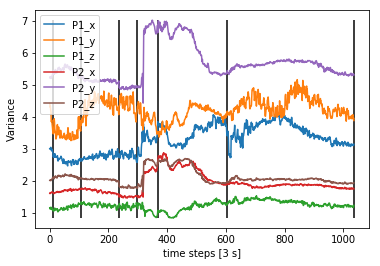

In [12]:
# Plot all the six variances
sg_labels = ['P1_x', 'P1_y', 'P1_z', 'P2_x', 'P2_y', 'P2_z']
for i in range(var.shape[1]):
    plt.plot(var[:,i], label = sg_labels[i])
plt.legend()
plt.vlines(DS_vline_coord, ymin=var.min(), ymax=var.max())
plt.ylabel('Variance')
plt.xlabel('time steps [3 s]')
plt.show()

Which one is the most significant?

Now proceed with the skewness

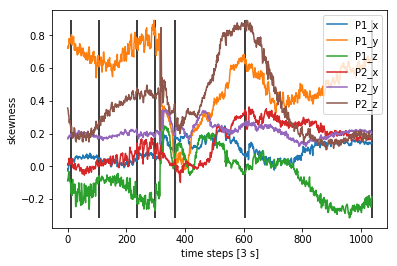

In [13]:
# To plot the skewness simply...
skew = []
for item in DS_stats:
    for stat in item:
        skew.append(stat[4])

skew = np.asarray(skew)

plt.plot(skew[:,0], label='P1_x')
plt.plot(skew[:,1], label='P1_y')
plt.plot(skew[:,2], label='P1_z')
plt.plot(skew[:,3], label='P2_x')
plt.plot(skew[:,4], label='P2_y')
plt.plot(skew[:,5], label='P2_z')
plt.legend()
plt.vlines(DS_vline_coord, ymin=skew.min(), ymax=skew.max())
plt.ylabel('skewness')
plt.xlabel('time steps [3 s]')
plt.show()

Visualize all the other stats in DS1

# 7- Build a classifier 

The aim is to train an algorithm and let it find the decision rule.
First of all we need to arrange the data in a convenient way, i.e. a numpy array.

In [19]:
DS_flat=[y for x in DS_stats for y in x]

In [41]:
Min

(array([-4.0665293, -5.806058 , -3.0151827, -4.9546046, -7.566949 ,
        -4.9530783], dtype=float32),
 array([4.336614 , 8.062867 , 3.0136569, 5.5207143, 9.129473 , 5.7206073],
       dtype=float32))

## 7.1 - Re-arranging data

In [18]:
Min, Max, Mean, Var, Skew, Kurtosis = [], [], [], [], [], []
for item in DS_stats:
    for stat in item:
        Min.append(stat[1][0])
        Max.append(stat[1][1])
        Mean.append(stat[2])
        Var.append(stat[3])
        Skew.append(stat[4])
        Kurtosis.append(stat[5])

data = [Min, Max, Mean, Var, Skew, Kurtosis]
data = [np.asarray(stat) for stat in data]
DS = np.concatenate(data, axis=1)
print(DS.shape)

(1037, 36)


Show how easy is to acces and plot the variance respect our first data structure...

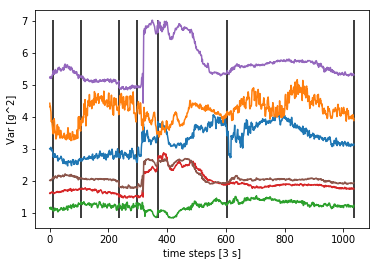

In [19]:
Var = DS[:,18:24]
plt.plot(Var)
plt.vlines(DS_vline_coord, ymin=Var.min(), ymax=Var.max())
plt.ylabel('Var [g^2]')
plt.xlabel('time steps [3 s]')
plt.show()

## 7.2 - Assigning class labels

Then we need to attach tags to each data entry. How to proceed?
Try a "blind" approach by using k-means clustering labels, assuming n_clusters = 2, like in the analysis from the engineering perspective.

In [20]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
import mystandardize as mstd
 
#kmeans = KMeans(n_clusters=2, random_state=0).fit(mstd.rescale(DS))
kmeans = KMeans(n_clusters=2, random_state=0).fit(DS)
DS_response = kmeans.labels_

Plot the outcome of this class labelling

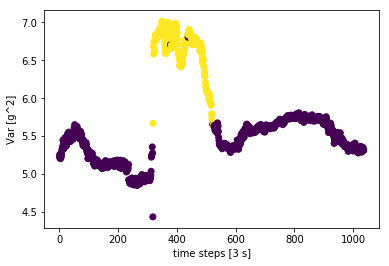

In [21]:
Var = DS[:,22]
plt.scatter(np.arange(len(Var)), Var, c=DS_response, cmap='viridis')
plt.ylabel('Var [g^2]')
plt.xlabel('time steps [3 s]')
plt.show()

What's the difference respect to alarm-based threshold encountered in Anlsysis I?

Make a comparison with the number of alarms detected from the Analysis I

In [22]:
# alarms label = 1
alarms = DS_response

n_alarms = sum(alarms)

percentage = n_alarms / len(alarms)

percentage

0.19575699132111862

## 7.3 - Train a simple Decision Tree

In [23]:
from sklearn.model_selection import train_test_split
from sklearn import tree

x_train, x_test, y_train, y_test = train_test_split(DS, DS_response, test_size=0.25, random_state=33)

clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5)
clf = clf.fit(x_train, y_train)

## 7.4 - Test it on the training and test set

Hint: you can use the measure_performance function in the corresponding module

In [24]:
import measure_performance as mp

mp.measure_performance(x_train, y_train, clf)

Accuracy:0.996 

Classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       629
           1       0.98      1.00      0.99       148

   micro avg       1.00      1.00      1.00       777
   macro avg       0.99      1.00      0.99       777
weighted avg       1.00      1.00      1.00       777
 

Confusion matrix
[[626   3]
 [  0 148]] 



In [25]:
mp.measure_performance(x_test, y_test, clf)

Accuracy:0.992 

Classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       205
           1       0.98      0.98      0.98        55

   micro avg       0.99      0.99      0.99       260
   macro avg       0.99      0.99      0.99       260
weighted avg       0.99      0.99      0.99       260
 

Confusion matrix
[[204   1]
 [  1  54]] 



## 7.5 - Interpret the decision tree

In [26]:
# on console
# conda install pip
# pip install graphviz
import graphviz

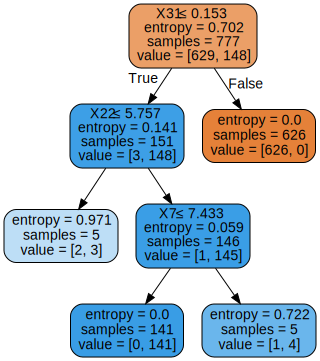

In [27]:
# from sklearn.externals.six import StringIO  
# from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = export_graphviz(clf, out_file=None,  
                filled=True, rounded=True,
                special_characters=True)
# graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph = graphviz.Source(dot_data)  
graph

## 7.6 - Inspect the number of clusters

We worked assuming n_clusters=2, in analogy with Analisis I. Is that the number of clusters we would have used with no knoledge about Analysis I?

Hint: use the elbow method, you can find a simple function to do that in elbow_plot.py

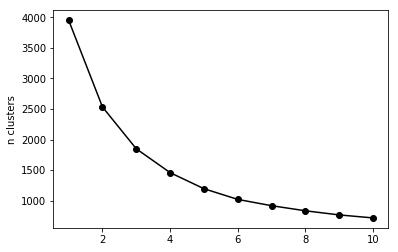

In [28]:
from elbow_plot import elbow_plot
    
elbow_plot(DS, n_max=10)

Interpret the outcome with 3 and 4 clusters

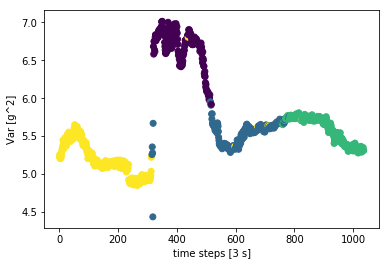

In [31]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(mstd.rescale(DS))
DS_response = kmeans.labels_

Var = DS[:,22]
plt.scatter(np.arange(len(Var)), Var, c=DS_response, cmap='viridis')
plt.ylabel('Var [g^2]')
plt.xlabel('time steps [3 s]')
plt.show()

## 7.7 - Re-train and test the model

n_clusters = 4

In [32]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(mstd.rescale(DS))
DS_response = kmeans.labels_

x_train, x_test, y_train, y_test = train_test_split(DS, DS_response, test_size=0.25, random_state=33)

clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5)
clf = clf.fit(x_train, y_train)

Measure the performance

In [33]:
mp.measure_performance(x_train, y_train, clf)

Accuracy:0.981 

Classification report
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       141
           1       0.95      0.98      0.97       190
           2       0.99      0.97      0.98       200
           3       1.00      0.98      0.99       246

   micro avg       0.98      0.98      0.98       777
   macro avg       0.98      0.98      0.98       777
weighted avg       0.98      0.98      0.98       777
 

Confusion matrix
[[141   0   0   0]
 [  1 187   1   1]
 [  0   6 194   0]
 [  1   4   1 240]] 



In [34]:
mp.measure_performance(x_test, y_test, clf)

Accuracy:0.988 

Classification report
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        52
           1       0.98      0.97      0.98        65
           2       0.99      0.99      0.99        68
           3       1.00      1.00      1.00        75

   micro avg       0.99      0.99      0.99       260
   macro avg       0.99      0.99      0.99       260
weighted avg       0.99      0.99      0.99       260
 

Confusion matrix
[[52  0  0  0]
 [ 1 63  1  0]
 [ 0  1 67  0]
 [ 0  0  0 75]] 



## 8- Repeat for the second dataset (DS2)